# Quick Start

Quick demonstration using included sample data sources.


In [11]:
 import os
 os.system("pip install --extra-index-url https://test.pypi.org/simple/ stocksml==0.0.1rc9")
 print('installed stocksml')

installed stocksml


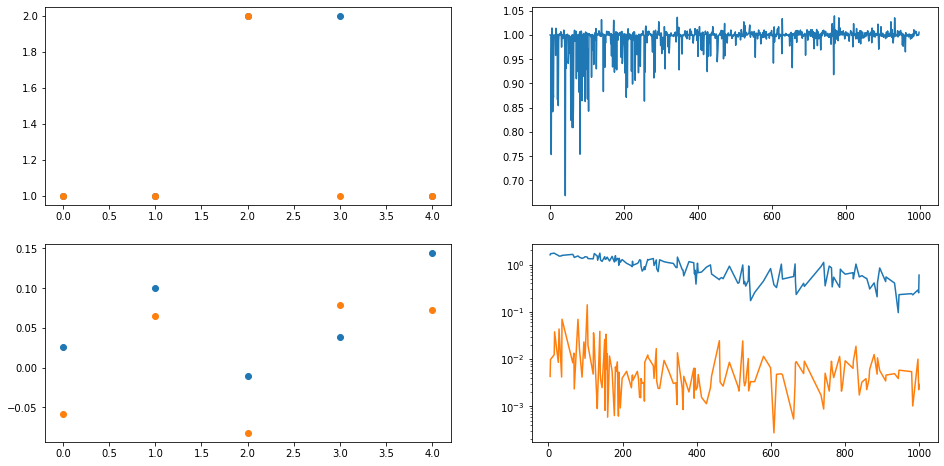

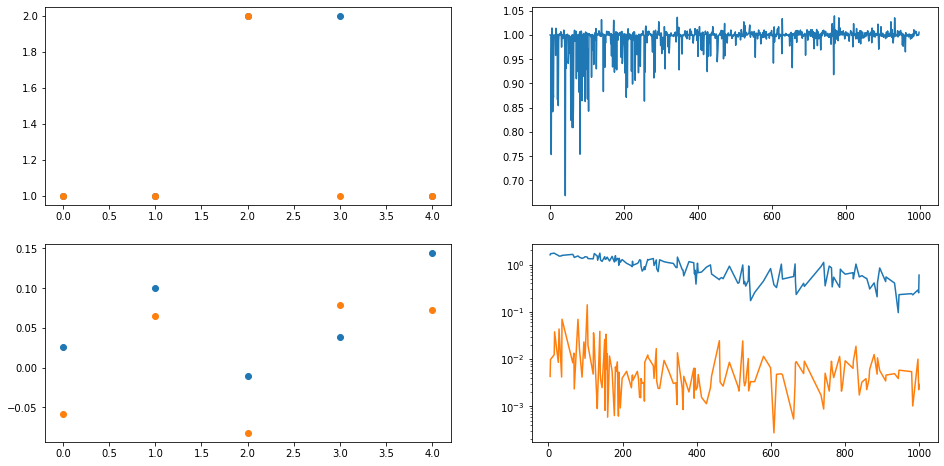

In [12]:
from stocksml import Demo

Demo(notebook=True)